## GP model for 10 classes

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor,GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel,WhiteKernel,RationalQuadratic, Matern, DotProduct
%matplotlib inline 

In [10]:
ds_demo = pd.read_csv("twitter_income.csv")
ds_demo.head()

,user_id,age,gender:female_gt_0_5,anxious:agree,anxious:strongly_agree,anxious:disagree,anxious:strongly_disagree,anxious:neither,children:no,children:yes,...,Topic_191,Topic_192,Topic_193,Topic_194,Topic_195,Topic_196,Topic_197,Topic_198,Topic_199,Topic_200
0,1103,30.700773,-0.050586,0.113558,0.034757,0.329889,0.221230,0.300567,0.682671,0.317329,...,0.143927,0.001070,0.001070,0.006956,0.042804,0.036918,0.019797,0.000000,0.093098,0.010166
1,8273,29.817867,0.376868,0.079798,0.030549,0.360824,0.285467,0.243363,0.693130,0.306870,...,0.164856,0.000000,0.001863,0.004967,0.053710,0.009624,0.005278,0.000621,0.066749,0.007762
2,9269,31.260406,0.204542,0.079508,0.026907,0.343969,0.273264,0.276351,0.835034,0.164966,...,0.136182,0.000000,0.001230,0.005841,0.014448,0.071011,0.004919,0.010452,0.043345,0.008300
3,10571,33.120257,0.164126,0.093635,0.037560,0.410242,0.185529,0.273034,0.837154,0.162846,...,0.128398,0.000000,0.002313,0.018508,0.020821,0.024870,0.010989,0.002313,0.074610,0.015616
4,11758,26.284088,-0.066739,0.103949,0.038573,0.239573,0.237358,0.380548,0.741889,0.258111,...,0.085206,0.000468,0.001404,0.004682,0.010768,0.020599,0.004682,0.001404,0.042603,0.015918


In [11]:
ds_demo = pd.read_csv("twitter_income.csv")
y = pd.cut(ds_demo.loc[:,"mean_income"], bins = 10, labels = list(range(0,10)))
# X = ds_demo.loc[:,['Topic_163','Topic_139','Topic_124','Topic_28','listed','enlish_tweets','Topic_95','Topic_162','foll_friend_ratio',
#  'followers','Topic_32','Topic_173','Topic_56','optimism:optimist','Topic_36','urls','friends','Topic_150','religion:muslim','Topic_157']]
# X = ds_demo.loc[:,['Topic_95','Topic_116','Topic_158',
#                    'Topic_163','Topic_139','Topic_97','Topic_124',
#                    'Topic_38','Topic_37','Topic_19','Topic_64','Topic_11',
#                    'Topic_120','Topic_66','Topic_3','Topic_40','Topic_105','Topic_153','Topic_170','Topic_99']]

X = ds_demo.loc[:,['Topic_173',
 'Topic_116',
 'Topic_124',
 'Topic_107',
 'Topic_139',
 'Topic_163',
 'age',
 'Topic_11',
 'Topic_105',
 'Topic_29',
 'Topic_180',
 'Topic_196',
 'Topic_66',
 'Topic_49',
 'foll_friend_ratio',
 'Topic_76',
 'listed',
 'Topic_160',
 'gender:female_gt_0_5',
 'Topic_95']]

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=999)

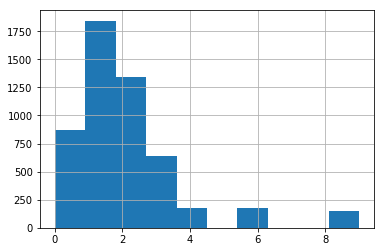

In [12]:
y.hist()

In [13]:
gp.predict?

In [14]:
kernel = 1.* RBF(length_scale=1., length_scale_bounds=(1e-5, 1e5)) \
#     + WhiteKernel(noise_level=1., noise_level_bounds=(1e-5, 1e5)) \
#     + RationalQuadratic(length_scale=1.) \
    
# gp = GaussianProcessRegressor(kernel=kernel, random_state=999)
gp = GaussianProcessClassifier(kernel=kernel, random_state=999)


gp.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=1, n_restarts_optimizer=0,
             optimizer='fmin_l_bfgs_b', random_state=999, warm_start=False)

In [15]:
y_pred = gp.predict(X_test)

print(gp.log_marginal_likelihood_value_)
print(gp.kernel_)

-1418.73495166
CompoundKernel(11.5, 4.92, 0.699, 3.75, 0.0999, 11.5, 11.5, 5.55, 2.45, 8.96, 2.43, 11.5, 11.5, 5.47)


In [16]:
y_pred

array([0, 1, 1, ..., 2, 1, 1])

In [17]:
gp.score(X_test, y_test)

0.38594802694898939

In [ ]:
import sklearn.model_selection

In [ ]:
scores = cross_val_score(gp, X, y, cv = 10)

In [ ]:
np.mean(scores)